In [1]:
# zipを圧縮解除
import os
import zipfile

local_zip = '/Users/choijeongho/Desktop/학교과제/3-1/지능정보실험3/cnn/ukio_west.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/Users/choijeongho/Desktop/학교과제/3-1/지능정보실험3/cnn')
zip_ref.close()

In [3]:
# 基本経路
base_dir = '/Users/choijeongho/Desktop/학교과제/3-1/지능정보실험3/cnn/ukio_west'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 訓練に使用される画像経路
train_ukio_dir = os.path.join(train_dir, 'ukio')
train_west_dir = os.path.join(train_dir, 'west')
print(train_ukio_dir)
print(train_west_dir)

# テストに使用される画像経路
validation_ukio_dir = os.path.join(validation_dir, 'ukio')
validation_west_dir = os.path.join(validation_dir, 'west')
print(validation_ukio_dir)
print(validation_west_dir)

/Users/choijeongho/Desktop/학교과제/3-1/지능정보실험3/cnn/ukio_west/train/ukio
/Users/choijeongho/Desktop/학교과제/3-1/지능정보실험3/cnn/ukio_west/train/west
/Users/choijeongho/Desktop/학교과제/3-1/지능정보실험3/cnn/ukio_west/validation/ukio
/Users/choijeongho/Desktop/학교과제/3-1/지능정보실험3/cnn/ukio_west/validation/west


In [4]:
# ファイル名
# os.listdir()メソッドは、経路内にあるファイルの名前をリストの形に返します。
train_ukio_fnames = os.listdir( train_ukio_dir )
train_west_fnames = os.listdir( train_west_dir )

print(train_ukio_fnames[:5])
print(train_ukio_fnames[:5])

['00001044.jpg', '00001050.jpg', '00000428.jpg', '00000400.jpg', '00000366.jpg']
['00001044.jpg', '00001050.jpg', '00000428.jpg', '00000400.jpg', '00000366.jpg']


In [5]:
# 訓練とテスト用ファイル数
print('Total training ukio images :', len(os.listdir(train_ukio_dir)))
print('Total training west images :', len(os.listdir(train_west_dir)))

print('Total validation ukio images :', len(os.listdir(validation_ukio_dir)))
print('Total validation west images :', len(os.listdir(validation_west_dir)))

Total training ukio images : 987
Total training west images : 1028
Total validation ukio images : 487
Total validation west images : 494


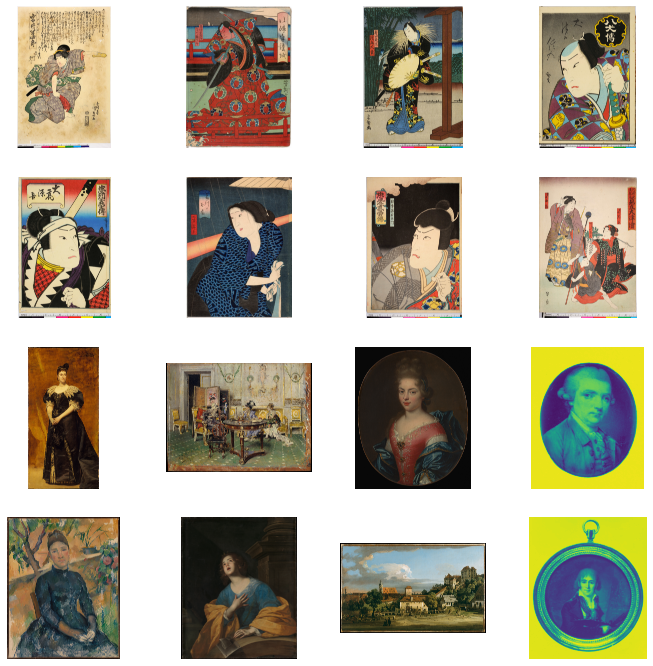

In [6]:
# 画像を確認
# nukio,westの絵をos.path.joinを通じて呼んでくる。
# os.path.join関数は、オペレーティングシステムに合わせてフォルダを扱って経路を生成します。

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_ukio_pix = [os.path.join(train_ukio_dir, fname)
                for fname in train_ukio_fnames[ pic_index-8:pic_index]]

next_west_pix = [os.path.join(train_west_dir, fname)
                for fname in train_west_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_ukio_pix+next_west_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
#モデル構成する
#model = TensorFlowを利用してcnnのモデルを構成します。
#Conv2D = 最初の要素16はフィルターの値です。2番目の要素である(3,3)はフィルターのサイズです。活性化関数銀はrelu。
# input_shapeは3次元絵を1次元データに変えるので(150,150,3)つまり150*150*3の1次元データに切り替えて入れる。
# Max-poolingは特定領域で最大値をサンプリングするpooling方式
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

2022-07-14 13:31:31.806221: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [8]:
#モデルコンパイル
#モデルコンパイル段階では、compile()メソッドを用いて損失関数(lossfunction)とオプティマイザー(optimizer)を指定します。
#RMSprop(RootMeanSquarePropagation)Algorithmは、訓練過程中に学習率を適切に変化させます。
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/Users/choijeongho/Library/Python/3.8/lib/python/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [9]:
#イメージデータの前処理
#まずImageDataGeneratorオブジェクトのrescaleパラメータを利用してすべてのデータを255に分けてから、flow_from_directory()メソッドを利用して訓練とテストに使われるイメージデータを作ります。

#最初の因子として画像が位置する経路を入力し、batch_size、class_modeを指定します。

#target_sizeに合わせて画像の大きさが調節されます。


from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2013 images belonging to 2 classes.
Found 979 images belonging to 2 classes.


In [11]:
#モデル訓練
#訓練とテストのためのデータセットであるtrain_generator、validation_generatorを入力します。
#epochsはデータセットを一度訓練する過程を意味します。
#steps_per_epochは、一度のエフォーク(epoch)で訓練に使用する配置(batch)の個数を指定します。
#validation_stepsは一度のエフォークが終わるとき、テストに使用されるバッチ(batch)の個数を指定します。

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=10,
                    epochs=10,
                    validation_steps=25,
                    verbose=2)

Epoch 1/10
10/10 - 233s - loss: 0.5956 - accuracy: 0.6900 - val_loss: 0.5076 - val_accuracy: 0.7820 - 233s/epoch - 23s/step
Epoch 2/10
10/10 - 243s - loss: 0.6244 - accuracy: 0.6750 - val_loss: 0.5891 - val_accuracy: 0.5140 - 243s/epoch - 24s/step
Epoch 3/10
10/10 - 253s - loss: 0.4361 - accuracy: 0.7979 - val_loss: 0.9713 - val_accuracy: 0.5120 - 253s/epoch - 25s/step
Epoch 4/10
10/10 - 233s - loss: 0.4683 - accuracy: 0.8400 - val_loss: 0.5152 - val_accuracy: 0.7640 - 233s/epoch - 23s/step
Epoch 5/10
10/10 - 263s - loss: 0.4552 - accuracy: 0.8100 - val_loss: 0.3369 - val_accuracy: 0.8720 - 263s/epoch - 26s/step
Epoch 6/10
10/10 - 262s - loss: 0.2438 - accuracy: 0.8850 - val_loss: 0.2819 - val_accuracy: 0.8960 - 262s/epoch - 26s/step
Epoch 7/10
10/10 - 268s - loss: 0.1259 - accuracy: 0.9750 - val_loss: 0.7480 - val_accuracy: 0.6220 - 268s/epoch - 27s/step
Epoch 8/10
10/10 - 252s - loss: 0.2846 - accuracy: 0.9100 - val_loss: 0.2950 - val_accuracy: 0.8780 - 252s/epoch - 25s/step
Epoch 9/

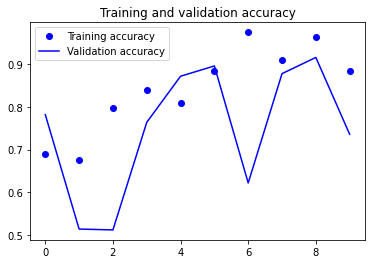

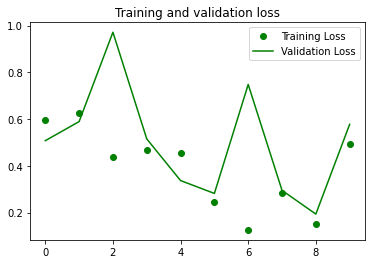

In [12]:
#正確度と損失確認

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()